# Deep Learning 101

This notebook presents the basics concepts that involve the concept of Deep Learning.

1. Linear Regression
* Logistic Regression
* Artificial Neural Networks
* Deep Neural Networks
* **Convolutional Neural Networks**

## 4. Convolutional Neural Networks

Convolutional networks are simply neural networks that use convolution in place of general matrix multiplication in at least one of their layers.

---

## Convolutional Neural Networks with Keras and TensorFlow

## 1. Load data

#### Load libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras import backend as K

#### Getting the data

In [3]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Explore visual data

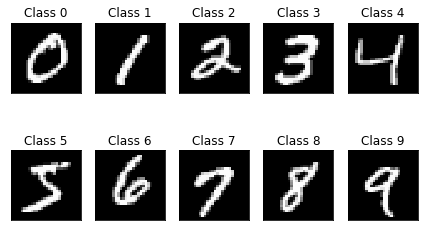

In [4]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='gray', interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

In [5]:
print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)
print('X_test.shape', X_test.shape)
print('y_train.shape', y_test.shape)

X_train.shape (60000, 28, 28)
y_train.shape (60000,)
X_test.shape (10000, 28, 28)
y_train.shape (10000,)


#### Reshaping and normalizing the inputs

In [6]:
# reshaping the inputs

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

# normalizing the inputs
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print('X_train reshape:', X_train.shape)
print('X_test reshape:', X_test.shape)

X_train reshape: (60000, 28, 28, 1)
X_test reshape: (10000, 28, 28, 1)


#### Convert class vectors to binary class matrices

In [7]:
# 10 classes
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print('y_train_cat shape:', y_train_cat.shape)
print('y_test_cat shape:', y_test_cat.shape)

y_train_cat shape: (60000, 10)
y_test_cat shape: (10000, 10)


## 2. Define model

#### Add the input-, hidden- and output-layers

In [8]:
# building a linear stack of layers with the sequential model
model = Sequential()

# Add the input layer and hidden layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Add the input layer and hidden layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))

# Flatten convolutional output
model.add(Flatten())

# Add the input layer and hidden layer 3
model.add(Dense(128, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

2021-08-08 20:32:44.785119: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Model visualization

In [9]:
# plot a Keras model
plot_model(model, to_file='img/model05_cnn.png',
           show_shapes=True, show_layer_names=True)

# prints a summary representation of your model
model.summary()

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4718720   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 4,738,826
Trainable params: 4,738,826
Non-trainable params: 0
______________________________

![Deep neural network](img/model05_cnn.png)

## 3. Compile model

In [10]:
# compiling the sequential model
model.compile('rmsprop', loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

## 4. Fit model

In [11]:
# training the model and saving metrics in history
history = model.fit(X_train, y_train_cat,
                    batch_size=256, epochs=50,
                    verbose=2,
                    validation_data=(X_test, y_test_cat))

Epoch 1/50


2021-08-08 20:32:44.997853: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-08-08 20:32:45.021693: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800000000 Hz


235/235 - 65s - loss: 0.1856 - categorical_accuracy: 0.9435 - val_loss: 0.0595 - val_categorical_accuracy: 0.9807
Epoch 2/50
235/235 - 72s - loss: 0.0450 - categorical_accuracy: 0.9857 - val_loss: 0.0531 - val_categorical_accuracy: 0.9818
Epoch 3/50
235/235 - 67s - loss: 0.0248 - categorical_accuracy: 0.9923 - val_loss: 0.0373 - val_categorical_accuracy: 0.9877
Epoch 4/50
235/235 - 63s - loss: 0.0137 - categorical_accuracy: 0.9956 - val_loss: 0.0663 - val_categorical_accuracy: 0.9789
Epoch 5/50
235/235 - 56s - loss: 0.0082 - categorical_accuracy: 0.9975 - val_loss: 0.0470 - val_categorical_accuracy: 0.9863
Epoch 6/50
235/235 - 50s - loss: 0.0045 - categorical_accuracy: 0.9985 - val_loss: 0.0524 - val_categorical_accuracy: 0.9882
Epoch 7/50
235/235 - 50s - loss: 0.0034 - categorical_accuracy: 0.9990 - val_loss: 0.0526 - val_categorical_accuracy: 0.9874
Epoch 8/50
235/235 - 50s - loss: 0.0022 - categorical_accuracy: 0.9993 - val_loss: 0.0548 - val_categorical_accuracy: 0.9885
Epoch 9/50


## 5. Evaluate model

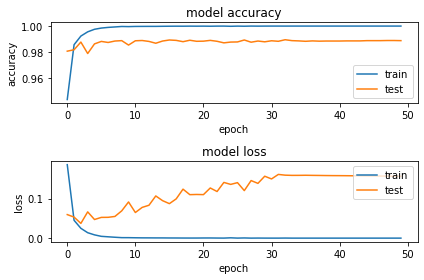

In [12]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [13]:
# evaluate model on test data
[test_loss, test_acc] = model.evaluate(X_test, y_test_cat)
print("Evaluation result on Test Data:\nLoss = {}\nAccuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 3s 8ms/step - loss: 0.1564 - categorical_accuracy: 0.9888
Evaluation result on Test Data:
Loss = 0.15637844800949097
Accuracy = 0.9887999892234802


## References

* [Deep Learning Book](http://www.deeplearningbook.org)

* [Zero to Deep Learning™ Udemy Video Course](https://github.com/dataweekends/zero_to_deep_learning_udemy)

* [THE MNIST DATABASE](http://yann.lecun.com/exdb/mnist/)